In [21]:
vuelos <- read.csv('../Clases/C3/Datasets/flights.csv')
paste(nrow(vuelos), ncol(vuelos), sep = ' x ')

[1] "336776 x 19"

In [20]:
library(dplyr)

In [10]:
# Sintaxis tradicional vs %>%

tradicional <- head(
    arrange(
        mutate(
            filter(
                count(vuelos, month, day, name = 'total'),
                day == 1
            ),
            max_vuelos = max(total)
        ),
        desc(total)
    )
)

nuevo <- vuelos %>%
            count(month, day, name = 'total') %>%
            mutate(min_vuelos = min(total)) %>% # Es más fácil ingresar condiciones entre medio
            filter(day == 1) %>%
            mutate(max_vuelos = max(total)) %>%
            arrange(desc(total)) %>%
            head()

tradicional
nuevo

,month,day,total,max_vuelos
,<int>,<int>,<int>,<int>
1,8,1,1000,1000
2,12,1,987,1000
3,11,1,986,1000
4,4,1,970,1000
5,7,1,966,1000
6,10,1,965,1000


,month,day,total,min_vuelos,max_vuelos
,<int>,<int>,<int>,<int>,<int>
1,8,1,1000,634,1000
2,12,1,987,634,1000
3,11,1,986,634,1000
4,4,1,970,634,1000
5,7,1,966,634,1000
6,10,1,965,634,1000


In [26]:
# Quisiera crear una nueva columna con datos de otra columna
# ifelse() permite trabajar con 2 alternativas, nativa de R.

vuelos_2 <- vuelos  %>%
    mutate(
        dia2 = ifelse(day < 10, paste0('0', day), day),
        mes2 = ifelse(month < 10, paste0('0', month), month),
        fecha = paste(dia2, mes2, year, sep = '/')
    )
vuelos_2

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,origin,dest,air_time,distance,hour,minute,time_hour,dia2,mes2,fecha
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
2013,1,1,517,515,2,830,819,11,UA,⋯,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,01,01,01/01/2013
2013,1,1,533,529,4,850,830,20,UA,⋯,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,01,01,01/01/2013
2013,1,1,542,540,2,923,850,33,AA,⋯,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,01,01,01/01/2013
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,01,01,01/01/2013
2013,1,1,554,600,-6,812,837,-25,DL,⋯,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,01,01,01/01/2013
2013,1,1,554,558,-4,740,728,12,UA,⋯,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,01,01,01/01/2013
2013,1,1,555,600,-5,913,854,19,B6,⋯,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,01,01,01/01/2013
2013,1,1,557,600,-3,709,723,-14,EV,⋯,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,01,01,01/01/2013
2013,1,1,557,600,-3,838,846,-8,B6,⋯,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,01,01,01/01/2013


In [28]:
vuelos_2  %>%
    mutate(fecha2 = as.Date(fecha, format = '%d/%m/%Y'))  # format debe escribir cómo se debe leer

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,dest,air_time,distance,hour,minute,time_hour,dia2,mes2,fecha,fecha2
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<date>
2013,1,1,517,515,2,830,819,11,UA,⋯,IAH,227,1400,5,15,2013-01-01 05:00:00,01,01,01/01/2013,2013-01-01
2013,1,1,533,529,4,850,830,20,UA,⋯,IAH,227,1416,5,29,2013-01-01 05:00:00,01,01,01/01/2013,2013-01-01
2013,1,1,542,540,2,923,850,33,AA,⋯,MIA,160,1089,5,40,2013-01-01 05:00:00,01,01,01/01/2013,2013-01-01
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,BQN,183,1576,5,45,2013-01-01 05:00:00,01,01,01/01/2013,2013-01-01
2013,1,1,554,600,-6,812,837,-25,DL,⋯,ATL,116,762,6,0,2013-01-01 06:00:00,01,01,01/01/2013,2013-01-01
2013,1,1,554,558,-4,740,728,12,UA,⋯,ORD,150,719,5,58,2013-01-01 05:00:00,01,01,01/01/2013,2013-01-01
2013,1,1,555,600,-5,913,854,19,B6,⋯,FLL,158,1065,6,0,2013-01-01 06:00:00,01,01,01/01/2013,2013-01-01
2013,1,1,557,600,-3,709,723,-14,EV,⋯,IAD,53,229,6,0,2013-01-01 06:00:00,01,01,01/01/2013,2013-01-01
2013,1,1,557,600,-3,838,846,-8,B6,⋯,MCO,140,944,6,0,2013-01-01 06:00:00,01,01,01/01/2013,2013-01-01


In [29]:
help(as.Date)

In [24]:
# Si existen múltiples alternativas se puede usar case_when() de dplyr

vuelos  %>%
    mutate(
        quarter = case_when(
            month <= 3 ~ 'Q1',
            month <= 6 ~ 'Q2',
            month <= 9 ~ 'Q3',
            TRUE ~ 'Q4'  # Equivale a else
        )
    )

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,quarter
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,Q1
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,Q1
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,Q1
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,Q1
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,Q1
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,Q1
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,Q1
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,Q1
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,Q1


In [58]:
retrasos <- vuelos  %>% 
                group_by(dest)  %>% 
                summarise(prom_arr_delay = mean(arr_delay, na.rm = TRUE))
#retrasos

retrasos  %>% 
    arrange(desc(prom_arr_delay))  %>% 
    mutate(n_fila = row_number())  %>% 
    filter(n_fila == 1)

retrasos  %>%
    mutate(n_fila = row_number(prom_arr_delay))  %>% 
    filter(n_fila == 1)

dest,prom_arr_delay,n_fila
<chr>,<dbl>,<int>
CAE,41.76415,1


dest,prom_arr_delay,n_fila
<chr>,<dbl>,<int>
LEX,-22,1


In [56]:
data(band_members)
data(band_instruments)

band_members
band_instruments

name,band
<chr>,<chr>
Mick,Stones
John,Beatles
Paul,Beatles


name,plays
<chr>,<chr>
John,guitar
Paul,bass
Keith,guitar


In [59]:
install.packages('ggplot2')

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’





The downloaded binary packages are in
	/var/folders/r2/y9m75_w11cdbjpb1tfp78p3r0000gp/T//Rtmp8eCwwb/downloaded_packages


In [64]:
library(ggplot2)

In [66]:
data(mpg)
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


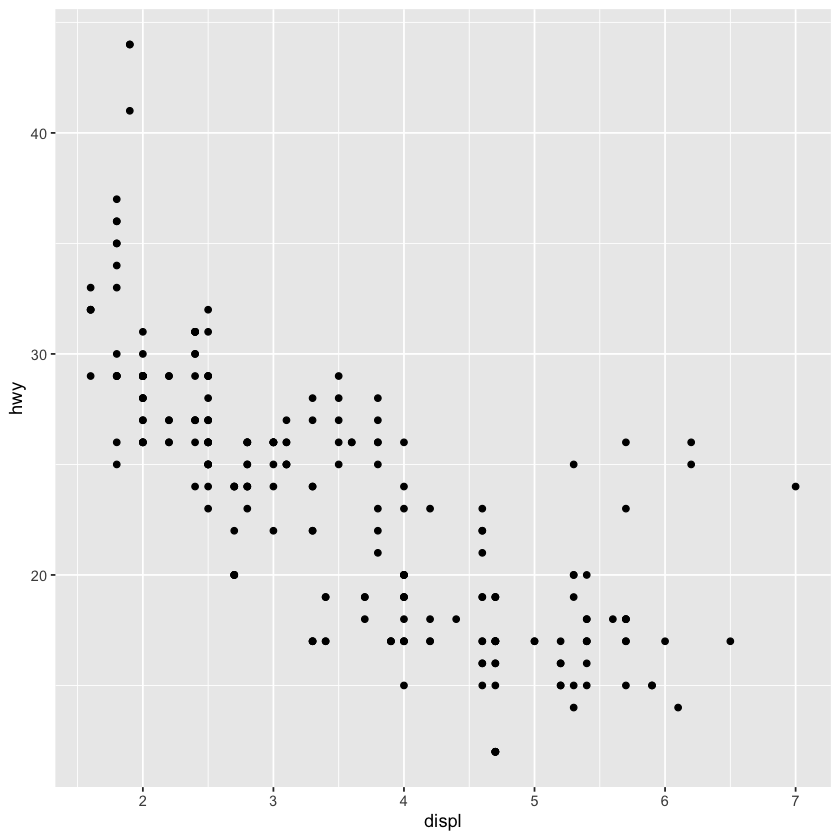

In [69]:
mpg %>%
    ggplot() + 
    aes(x = displ, y = hwy) +
    geom_point()

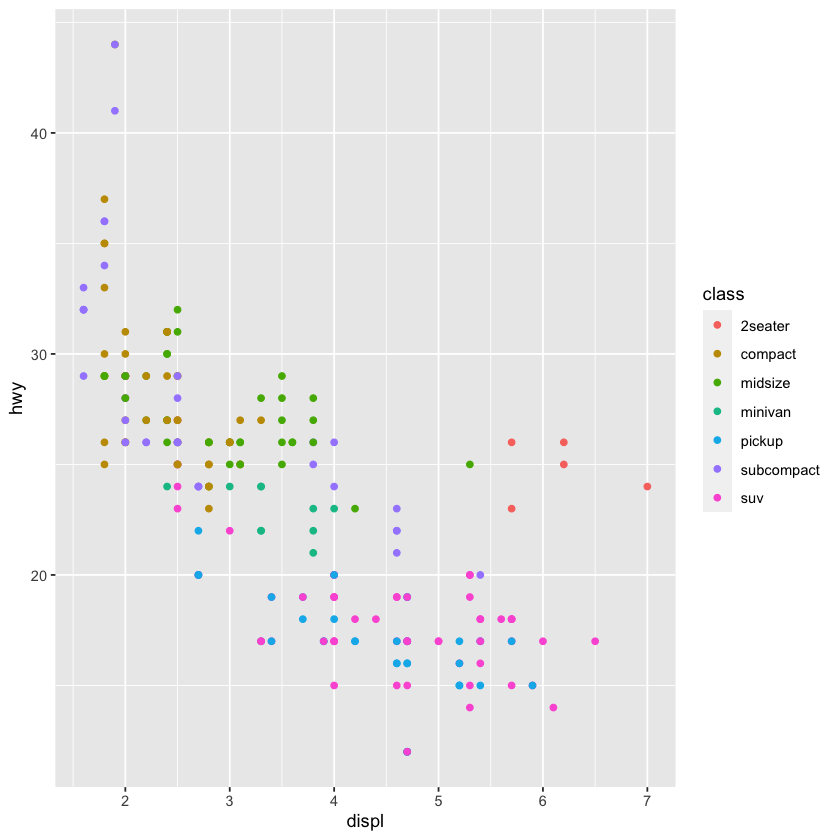

In [70]:
mpg %>% 
    ggplot() +
    aes(x = displ, y = hwy, color = class) +
    geom_point()

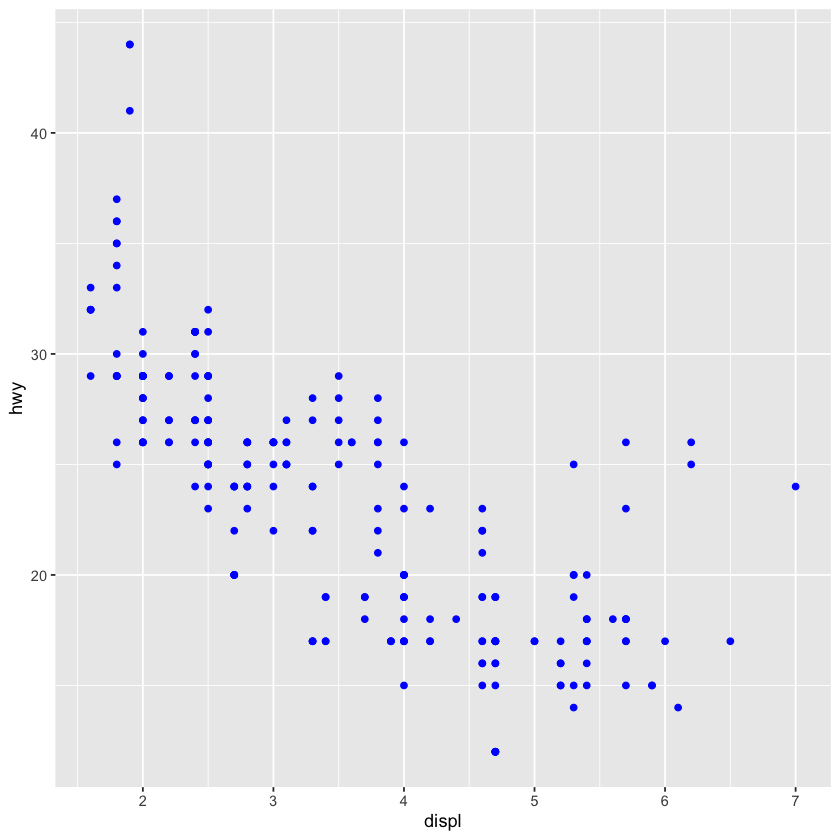

In [74]:
mpg %>% 
    ggplot() +
    aes(x = displ, y = hwy) +
    geom_point(color = 'blue')

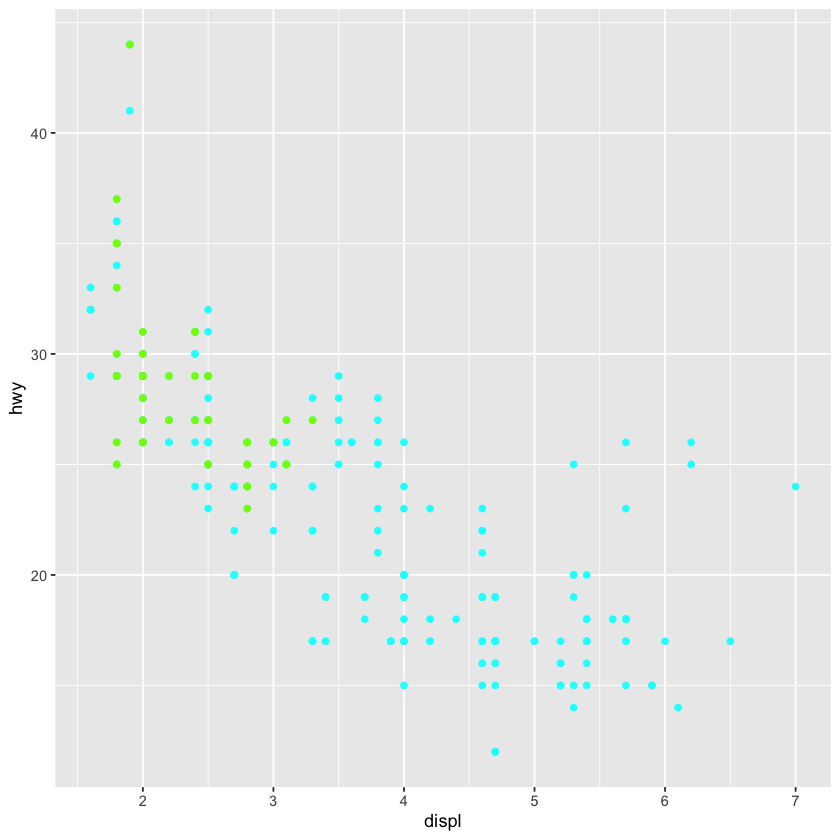

In [79]:
mpg %>%
    ggplot() + 
    aes(x = displ, y = hwy) +
    geom_point(color = 'cyan') +
    geom_point(data = mpg %>% filter(class == 'compact'), color = 'chartreuse')